# Tugas2 - Machine Learning - Kelompok 1

# Pemahaman Dataset

## Sumber Data

Dataset yang digunakan adalah Boston Housing Dataset, yang berasal dari Boston Standard Metropolitan Statistical Area (SMSA) tahun 1970. Dataset ini sering digunakan untuk masalah regresi dalam machine learning dan analisis statistik.

https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data

## Deskripsi Variabel
Setiap entri dalam dataset ini merepresentasikan sebuah kota atau daerah di Boston. Dataset ini memiliki berbagai variabel yang mencerminkan faktor ekonomi, lingkungan, dan sosial yang dapat mempengaruhi harga rumah (MEDV). Berikut adalahenjelasan setiap variabel dalam dataset:

### Variabel Independen (Fitur)
1. CRIM: Tingkat kejahatan per kapita di tiap kota.

2. ZN: Proporsi lahan perumahan yang memiliki luas lebih dari 25.000 kaki persegi.

3. INDUS: Persentase area bisnis non-ritel di suatu kota.

4. CHAS: Variabel dummy (1 jika daerah berbatasan dengan Sungai Charles, 0 jika tidak).

5. NOX: Konsentrasi nitrogen oksida dalam satuan bagian per 10 juta.

6. RM: Rata-rata jumlah kamar dalam setiap rumah.

7. AGE: Proporsi unit rumah yang dimiliki dan dibangun sebelum tahun 1940.

8. DIS: Jarak tertimbang ke lima pusat pekerjaan utama di Boston.

9. RAD: Indeks aksesibilitas ke jalan raya utama (radial highways).

10. TAX: Tingkat pajak properti penuh per $10.000.

11. PTRATIO: Rasio jumlah siswa terhadap guru di tiap kota.

12. B: Nilai hitungan dari 1000(Bk−0.63)², di mana Bk adalah persentase populasi kulit hitam di suatu kota.

13. LSTAT: Persentase populasi dengan status ekonomi rendah.

### Variabel Dependen (Target)
14. MEDV: Nilai median rumah yang dimiliki dalam satuan ribuan dolar.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

data = pd.read_csv("dataset/boston.csv")

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [3]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## EDA

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Cek Missing Value

In [5]:
# Cek jumlah missing value per kolom
missing_values = data.isnull().sum()

# Cek total missing value dalam dataset
total_missing = missing_values.sum()

print("Jumlah missing value per kolom:")
print(missing_values)
print(f"\nTotal missing value dalam dataset: {total_missing}")


Jumlah missing value per kolom:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Total missing value dalam dataset: 0


Dataset tidak memiliki missing value

### Distribusi nilai seluruh fitur

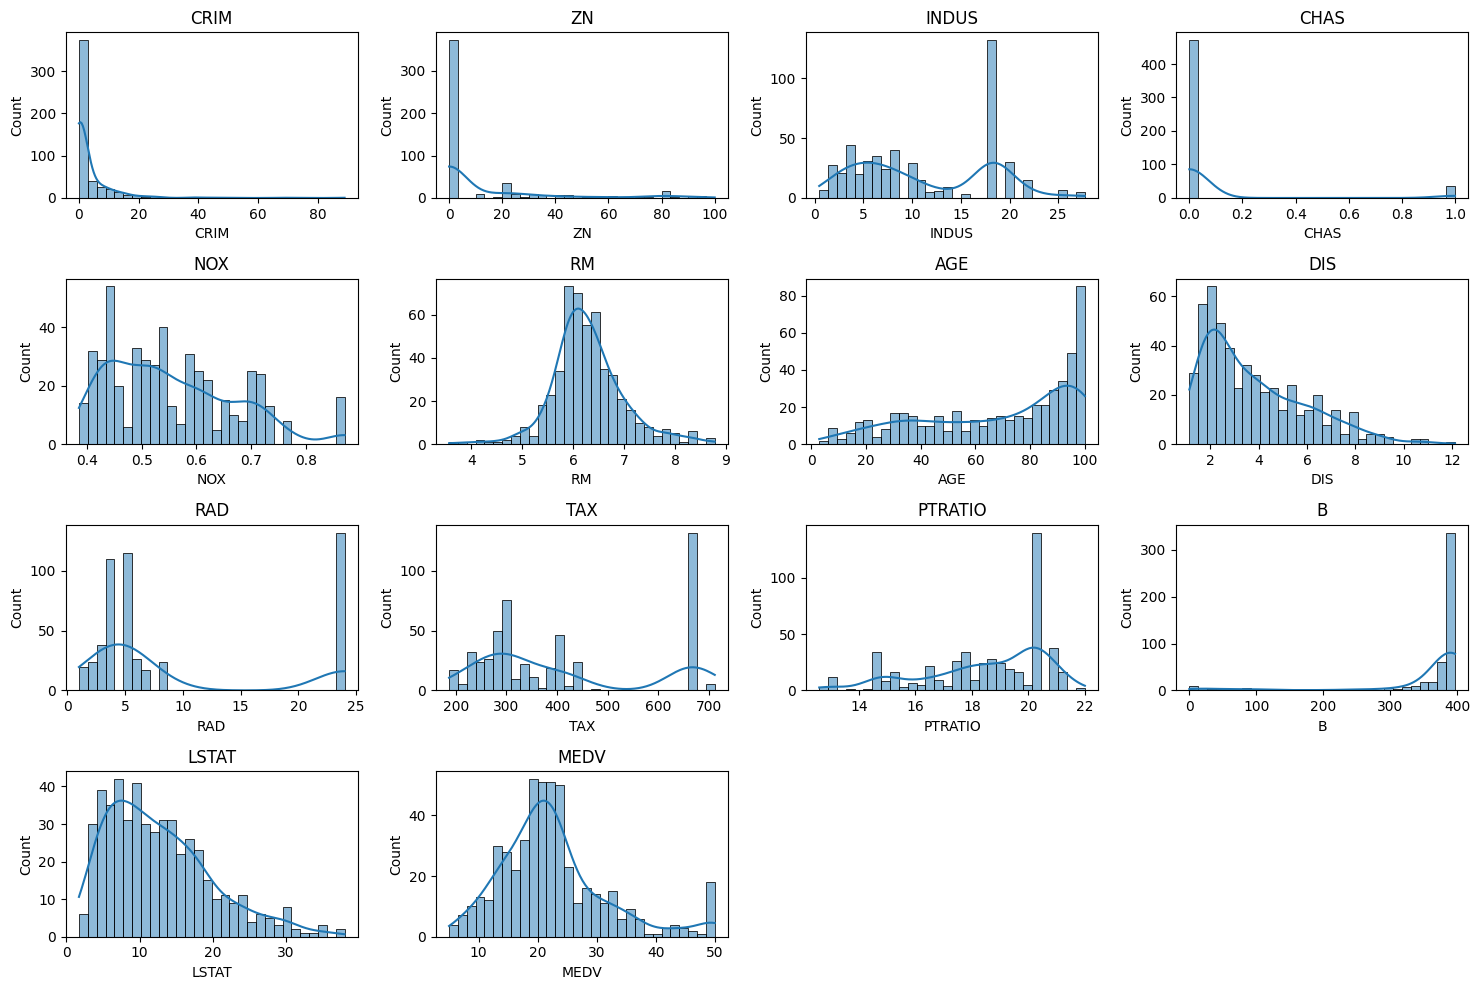

In [6]:
# Set ukuran figure
plt.figure(figsize=(15, 10))

# Loop untuk menampilkan histogram setiap kolom
for i, column in enumerate(data.columns, 1):
    plt.subplot(4, 4, i)  # Sesuaikan jumlah baris dan kolom subplot
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

Data cenderung skewed (miring), namun terdapat beberapa yang sudah terlihat normal, seperti RM, MEDV

### Heatmap untuk melihat korelasi antarvariabel

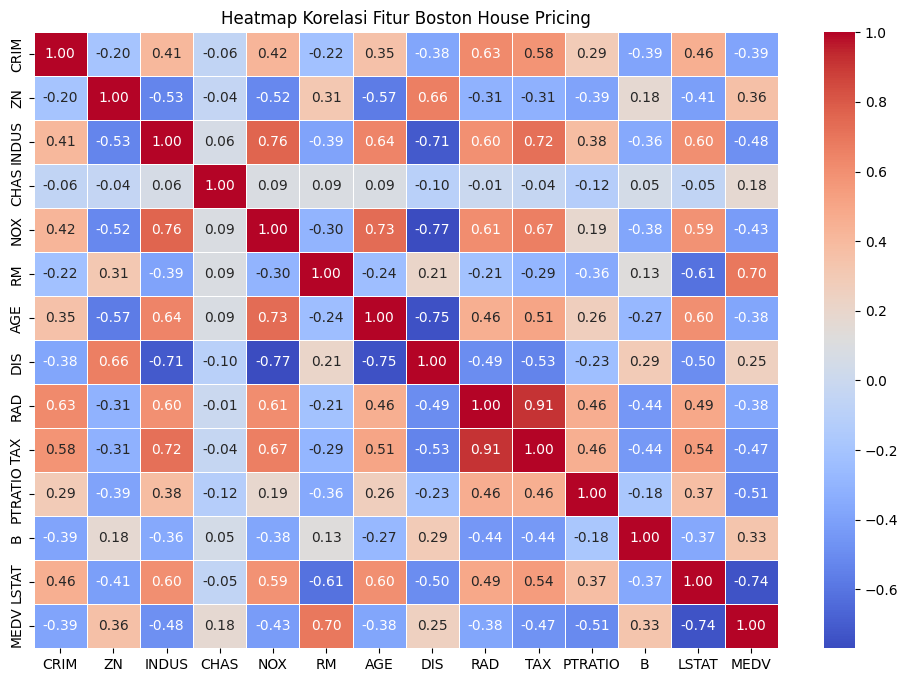

In [7]:
# Hitung matriks korelasi
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Heatmap Korelasi Fitur Boston House Pricing")
plt.show()

Jadi terdapat 2 fitur yang korelasinya itu cukup tinggi, yaitu 'RAD', dan 'TAX', ini tidak baik untuk model regressi karena dapat menyebabkan multicolliearity, jadi kita hapus aja salah satu dari 2 fitur itu, untuk yang dihapus itu adalah RAD, alasannya adalah distribusi dari kolom 'RAD' tidak lebih baik daripada kolom 'TAX'

In [8]:
#  Hapus fitur RAD
data.drop(['RAD'], axis=1, inplace=True)

## Log Transformation dan Standarisasi

**Log Transformation**  dilakukan dikarenakan kita memiliki data yang skewed (miring), distribusinya belum normal, kita coba ubah agar mendekati distribusi normal

**Standarisasi** dilakukan untuk menyamakan rentang nilai dari seluruh data (mean = 0, standar deviasi = 1)

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [10]:
# Pilih kolom untuk log transformation
columns_to_transform = ['CRIM', 'NOX', 'TAX', 'AGE', 'DIS', 'PTRATIO', 'LSTAT', 'B']

In [11]:
# Lakukan log transformation
for col in columns_to_transform:
    data[col] = np.log1p(data[col])  # log(1 + x) untuk menghindari log(0)

In [12]:
#  Pisahkan fitur (X) dan target (y)
X = data.drop(['MEDV'], axis=1)  # Fitur (tanpa target)
y = data['MEDV']  # Target

In [13]:
# Split dataset (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=51)

In [14]:
#  Standarisasi hanya dengan data training (untuk menghindari data leakage)**
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Implementasi Model

### Linear Regression

In [15]:
# **Step 8: Train model Linear Regression**
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# **Interpretasi Koefisien Regresi**
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Koefisien'])
print("\n Koefisien Regresi:")
print(coef_df.sort_values(by='Koefisien', ascending=False))

# **Step 9: Prediksi pada test set**
y_pred = model.predict(X_test_scaled)

# **Step 10: Evaluasi model**
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# **Step 11: Tampilkan hasil evaluasi**
print(f"\n Mean Squared Error (MSE): {mse:.4f}")
print(f" Mean Absolute Error (MAE): {mae:.4f}")
print(f" R² Score: {r2:.4f}")



 Koefisien Regresi:
         Koefisien
RM        2.201587
B         0.887338
CHAS      0.789847
AGE       0.697692
CRIM      0.426548
ZN        0.009895
TAX      -0.137377
INDUS    -0.164907
PTRATIO  -1.751206
NOX      -2.259726
DIS      -2.756087
LSTAT    -5.371723

 Mean Squared Error (MSE): 20.7593
 Mean Absolute Error (MAE): 3.1947
 R² Score: 0.7888


### Interpretasi Koefisien Regresi

Fitur dengan Pengaruh Positif Terbesar 💹

**RM (Jumlah rata-rata kamar) → Koefisien: 2.2016**

Semakin banyak jumlah kamar dalam rumah, harga rumah cenderung meningkat. Ini masuk akal karena rumah dengan lebih banyak kamar biasanya lebih besar dan lebih mewah, sehingga memiliki nilai jual yang lebih tinggi.

Fitur dengan Pengaruh Negatif Terbesar 📉

**LSTAT (Persentase penduduk berpenghasilan rendah) → Koefisien: -5.3717**

Semakin tinggi persentase penduduk berpenghasilan rendah di suatu area, harga rumah cenderung turun. Hal ini menunjukkan bahwa faktor sosial-ekonomi berperan besar dalam menentukan nilai properti.

### Regression Line

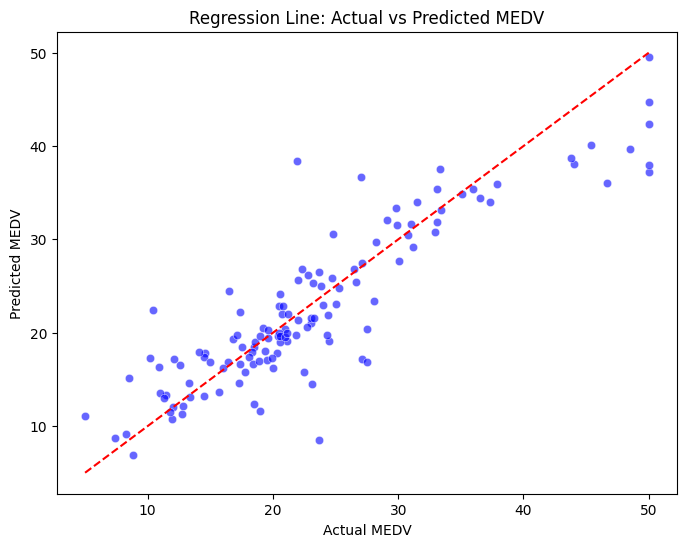

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color='red', linestyle="--")  # Ideal fit line

plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Regression Line: Actual vs Predicted MEDV")
plt.show()

## PolynomialRegression

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Buat fitur polinomial (derajat 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Latih model Linear Regression dengan fitur polinomial
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Prediksi dan hitung R² Score
y_pred_poly = poly_model.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)

print(f"R² Score - Polynomial Regression (degree=2): {r2_poly:.4f}")
print(f"MSE Score - Polynomial Regression (degree=2): {mse_poly:.4f}")
print(f"MAE Score - Polynomial Regression (degree=2): {mae_poly:.4f}")

R² Score - Polynomial Regression (degree=2): 0.8906
MSE Score - Polynomial Regression (degree=2): 10.7539
MAE Score - Polynomial Regression (degree=2): 2.4063


### Polynomial Fit

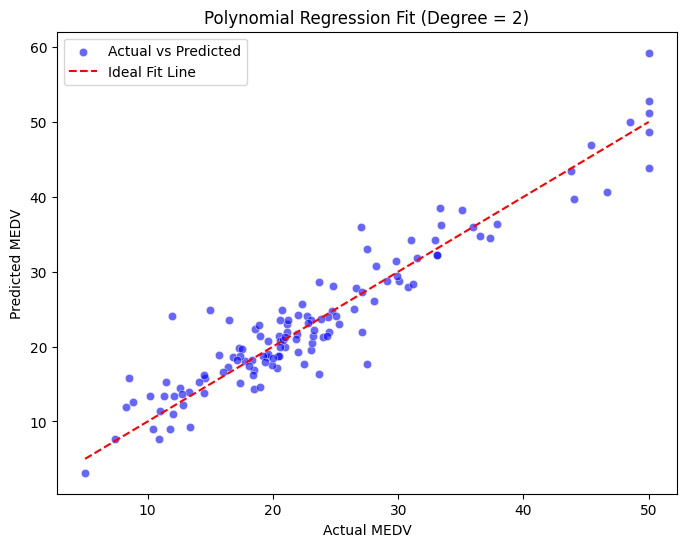

In [18]:
# ** Plot Polynomial Fit**
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_poly, color='blue', alpha=0.6, label="Actual vs Predicted")
sns.lineplot(x=y_test, y=y_test, color='red', linestyle="--", label="Ideal Fit Line")  # Ideal Fit

plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Polynomial Regression Fit (Degree = 2)")
plt.legend()
plt.show()

# **Perbandingan Evaluasi Model: Linear Regression vs Polynomial Regression**

## **Evaluasi Kinerja Model**
Tabel berikut membandingkan performa kedua model berdasarkan metrik evaluasi:  

| Model                          | MSE     | MAE     | R² Score |
|--------------------------------|---------|---------|----------|
| **Linear Regression**          | 20.7593 | 3.1947  | 0.7888   |
| **Polynomial Regression (D=2)**| 10.7539 | 2.4063  | 0.8906   |

## **Kesimpulan**
- **Polynomial Regression (Degree = 2) memiliki MSE dan MAE lebih rendah**, menunjukkan prediksi yang lebih akurat.  
- **R² Score lebih tinggi (0.8906 dibanding 0.7888)**, berarti model ini lebih mampu menangkap pola dalam data.  
- **Polynomial Regression (D=2) adalah model dengan performa lebih baik dibandingkan Linear Regression dalam prediksi harga rumah pada dataset ini.**  
